In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
import warnings
warnings.filterwarnings("ignore")

# Load the dataset
file_path = '/Users/fatemeaskari/Downloads/Subjects_Separate_Sheets.xlsx'
data = pd.read_excel(file_path, sheet_name=0)

# Define the selected features based on previous analysis
selected_features = ['MedianAbsDev', 'HFD', 'HFD_cardio', 'AVpw', 'meanA1', 
                     'meanArea', 'meanIPAR', 'stdIPAR', 'meanT1', 'meanT2']

# Prepare the data for training
X = data[selected_features]
y = data['Class']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Define the parameter grid
param_grid = {
    'n_estimators': [50, 100, 200],  # Number of trees
    'max_depth': [10, 20, 30, None],  # Maximum depth of the tree
    'min_samples_split': [2, 5, 10],  # Minimum samples required to split a node
    'min_samples_leaf': [1, 2, 4],  # Minimum samples required at each leaf node
}

# Initialize the RandomForest model
rf = RandomForestClassifier(random_state=42)

# Set up GridSearchCV with cross-validation (cv=5)
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2)

# Fit the model to find the best hyperparameters
grid_search.fit(X_train, y_train)

# Get the best hyperparameters from the grid search
best_params = grid_search.best_params_
print(f"Best Parameters: {best_params}")

# Train the model using the best parameters
best_rf = grid_search.best_estimator_

# Make predictions on the test set
y_pred = best_rf.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy after tuning: {accuracy:.2f}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

Fitting 5 folds for each of 108 candidates, totalling 540 fits
[CV] END max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=   0.1s
[CV] END max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=   0.1s
[CV] END max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=   0.1s
[CV] END max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=   0.1s
[CV] END max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=   0.1s
[CV] END max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.2s
[CV] END max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.2s
[CV] END max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.2s
[CV] END max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.2s
[CV] END max_depth=10, min_sample

In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
import warnings
warnings.filterwarnings("ignore")

# Load and prepare the dataset
def load_data(file_path):
    """Load the dataset and return the features and target variable."""
    data = pd.read_excel(file_path, sheet_name=0)
    
    # Define the top 20 features based on their importance
    selected_features = ['MedianAbsDev', 'HFD', 'HFD_cardio', 'AVpw', 'meanA1', 
                         'meanArea', 'meanIPAR', 'stdIPAR', 'meanT1', 'meanT2',
                         'geometricMean', 'tmean50', 'averageTeagerEnergy', 'shapeFactor', 
                         'CCM_cardio', 'rmsValue', 'tmean25', 'averageCurveLength',
                         'meanValue_cardio', 'sdValue_cardio']  # Example top 20 features
    X = data[selected_features]
    y = data['Class']
    return X, y

# Split data into training and testing sets
def split_data(X, y):
    """Split the data into training and test sets."""
    return train_test_split(X, y, test_size=0.3, random_state=42)

# Perform hyperparameter tuning using GridSearchCV
def tune_model(X_train, y_train):
    """Tune the model using GridSearchCV and return the best model."""
    param_grid = {
        'n_estimators': [50, 100, 200],  
        'max_depth': [10, 20, 30, None],  
        'min_samples_split': [2, 5, 10],  
        'min_samples_leaf': [1, 2, 4],  
    }

    rf = RandomForestClassifier(random_state=42)
    grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2)
    grid_search.fit(X_train, y_train)
    
    print(f"Best Parameters: {grid_search.best_params_}")
    return grid_search.best_estimator_

# Evaluate the model's performance
def evaluate_model(model, X_test, y_test):
    """Evaluate the model on the test set and print accuracy and classification report."""
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    print(f"Accuracy after tuning with 20 features: {accuracy:.2f}")
    print("\nClassification Report:")
    print(classification_report(y_test, y_pred))

def main():
    # File path to dataset
    file_path = '/Users/fatemeaskari/Downloads/Subjects_Separate_Sheets.xlsx'
    
    # Load and split data
    X, y = load_data(file_path)
    X_train, X_test, y_train, y_test = split_data(X, y)
    
    # Tune the model
    best_rf_model = tune_model(X_train, y_train)
    
    # Evaluate the tuned model
    evaluate_model(best_rf_model, X_test, y_test)

if __name__ == "__main__":
    main()

Fitting 5 folds for each of 108 candidates, totalling 540 fits
[CV] END max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=   0.1s
[CV] END max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=   0.1s
[CV] END max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=   0.1s
[CV] END max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=   0.1s
[CV] END max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=   0.1s
[CV] END max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.2s
[CV] END max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.2s
[CV] END max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.3s
[CV] END max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.2s
[CV] END max_depth=10, min_sample

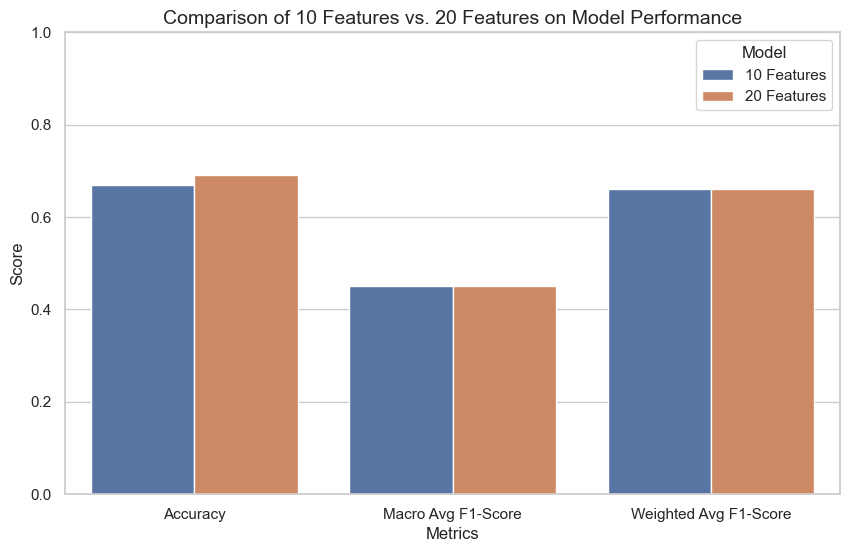

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Data for comparison 
data = {
    'Metrics': ['Accuracy', 'Macro Avg F1-Score', 'Weighted Avg F1-Score'],
    '10 Features': [0.67, 0.45, 0.66],
    '20 Features': [0.69, 0.45, 0.66]
}

# Convert to DataFrame
df = pd.DataFrame(data)

# Melt the DataFrame for easier plotting
df_melted = df.melt(id_vars='Metrics', var_name='Model', value_name='Score')

# Set the plotting style
sns.set(style='whitegrid')

# Create a barplot to compare the results
plt.figure(figsize=(10, 6))
sns.barplot(x='Metrics', y='Score', hue='Model', data=df_melted)

# Add title and labels
plt.title('Comparison of 10 Features vs. 20 Features on Model Performance', fontsize=14)
plt.ylabel('Score')
plt.ylim(0, 1)  # Set limits for the y-axis to range from 0 to 1 for easier comparison

# Display the plot
plt.show()

In [1]:
# Import necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report
import warnings
warnings.filterwarnings("ignore")

# Load the dataset from an Excel file
file_path = '/Users/fatemeaskari/Downloads/Subjects_Separate_Sheets.xlsx'
data = pd.read_excel(file_path, sheet_name=0)


# These features are selected for their importance in predicting the target class
selected_features = ['MedianAbsDev', 'HFD', 'HFD_cardio', 'AVpw', 'meanA1', 
                     'meanArea', 'meanIPAR', 'stdIPAR', 'meanT1', 'meanT2']

# Prepare the data for training by selecting the features (X) and target variable (y)
X = data[selected_features]
y = data['Class']

# Split the data into training and testing sets (70% training, 30% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Define the machine learning models to be tested
models = {
    'RandomForest': RandomForestClassifier(n_estimators=100, random_state=42),
    'SVM': SVC(kernel='linear', random_state=42),
    'GradientBoosting': GradientBoostingClassifier(n_estimators=100, random_state=42)
}

# Train and evaluate each model
for model_name, model in models.items():
    # Train the model on the training data
    model.fit(X_train, y_train)
    
    # Make predictions on the testing data
    y_pred = model.predict(X_test)
    
    # Calculate accuracy of the model
    accuracy = accuracy_score(y_test, y_pred)
    
    # Perform 5-fold cross-validation on the training data
    cv_scores = cross_val_score(model, X_train, y_train, cv=5)
    
    # Print model evaluation results
    print(f"Model: {model_name}")
    print(f"Accuracy: {accuracy:.2f}")
    print(f"Cross-Validation Score: {cv_scores.mean():.2f}")
    print("Classification Report:")
    print(classification_report(y_test, y_pred))
    print("-" * 50)

Model: RandomForest
Accuracy: 0.67
Cross-Validation Score: 0.65
Classification Report:
              precision    recall  f1-score   support

           1       0.44      0.32      0.37        57
           2       0.49      0.55      0.52        74
           3       0.17      0.13      0.15        15
           4       0.81      0.84      0.83        31
           5       0.00      0.00      0.00         9
           6       0.80      0.88      0.84       188

    accuracy                           0.67       374
   macro avg       0.45      0.45      0.45       374
weighted avg       0.64      0.67      0.66       374

--------------------------------------------------
Model: SVM
Accuracy: 0.62
Cross-Validation Score: 0.66
Classification Report:
              precision    recall  f1-score   support

           1       0.40      0.07      0.12        57
           2       0.40      0.65      0.50        74
           3       0.00      0.00      0.00        15
           4       0.54 